### Adding Packages Needed

In [1]:
import requests
!pip install tweepy
import tweepy

In [192]:
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import requests
import re
from bs4 import BeautifulSoup
import selenium
from pandas import ExcelWriter
from pandas import ExcelFile
import xlrd
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import fuzzywuzzy as fw
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline


In [3]:
import twitter

### API key

In [4]:
consumer_key = '9KUgZEXWJMCzMwENNbeiGVe7R'

consumer_secret = '2ifoTtaLMmvegpK6plYJ6bS3t5mM1vPQp2Jjbi7A8OkacNS4RJ'

In [5]:
access_token = '421398566-q75AAj5G3jurYQlGvueb3BscUQ9xie4oe50cxoee'

access_secret = 'tT2OI0HCm1qIYpOxSYkb9HvKBczQkQ7Fi1W9TuH4rKX77'

### Connecting twitter dev API w/ twitter python library

In [6]:
api = twitter.Api(consumer_key = consumer_key , consumer_secret = consumer_secret, access_token_key = access_token, access_token_secret = access_secret )

In [7]:
users = api.GetFriends()

In [8]:
results = api.GetSearch(
     raw_query='q=-from%3Aquotedreplies%20url%3A1191762097740419077&f=live&count=100')

In [9]:
len(results)

21

In [10]:
results

[Status(ID=1202140944021090305, ScreenName=OverbrookPR, Created=Wed Dec 04 08:21:50 +0000 2019, Text='RT @AppleTV: Dutiful daughter and daydreamer. 🛹\n\nMeet Hala in the Apple Original film, coming to Apple TV+ on Dec 6. #HalaMovie  https://t.…'),
 Status(ID=1201707702642192385, ScreenName=sarahaoudexo, Created=Tue Dec 03 03:40:17 +0000 2019, Text='RT @bilqees_786: muslim girls are NOT OPPRESSED we do not need a WHITE MAN to FREE US and tbh we dont even find white men cute so can yall…'),
 Status(ID=1201704612341964800, ScreenName=sxbye__, Created=Tue Dec 03 03:28:00 +0000 2019, Text='RT @bilqees_786: muslim girls are NOT OPPRESSED we do not need a WHITE MAN to FREE US and tbh we dont even find white men cute so can yall…'),
 Status(ID=1201614877229379584, ScreenName=victoriaguna, Created=Mon Dec 02 21:31:26 +0000 2019, Text='Stereotype on stereotype.. this is not okay. https://t.co/1mc0cwr9e3'),
 Status(ID=1201427999582760960, ScreenName=_ahmedsaleeha, Created=Mon Dec 02 09:08:51 +000

### Importing Twitter "HALA MOVIE" search data

In [24]:
df_halasearch = pd.read_csv('output_got.csv',encoding= 'utf-8')

In [25]:
df_halasearch.head()

date     username              to  replies  retweets  \
0  2019-12-03 21:45:39     Kaiver05             NaN        0         0   
1  2019-12-03 20:27:57  DuyguToplan             NaN        0         0   
2  2019-12-03 19:46:44    MovieHala  windsandstarss        0         0   
3  2019-12-03 19:42:48    MovieHala   unhappyhcarts        0         0   
4  2019-12-03 19:42:35    MovieHala  hurricanemaddy        0         0   

   favorites                                               text  geo mentions  \
0          0           Hala nakakamiss manood ng anime na movie  NaN      NaN   
1          1  Yaş 36 ve Sex and the City movie izlerken hâlâ...  NaN      NaN   
2          0  https://www.movieshdstreaming.com/movies/the-g...  NaN      NaN   
3          0  https://www.movieshdstreaming.com/movies/the-g...  NaN      NaN   
4          0  Here is for everyone https://www.movieshdstrea...  NaN      NaN   

  hashtags                   id  \
0      NaN  1201980844446871552   
1      NaN  1201961288915701761   
2      NaN  1201950918142496768   
3      NaN  1201949926642593792   
4      NaN  1201949874431909889   

                                           permalink  
0  https://twitter.com/Kaiver05/status/1201980844...  
1  https://twitter.com/DuyguToplan/status/1201961...  
2  https://twitter.com/MovieHala/status/120195091...  
3  https://twitter.com/MovieHala/status/120194992...  
4  https://twitter.com/MovieHala/status/120194987...

In [26]:
df_halasearch['date'][0]

'2019-12-03 21:45:39'

### Formating "Date" Column of Hala Movie Twitter Search Dataframe

In [43]:
df_halasearch['date'] = df_halasearch['date'].str.split(" ").str[0]

In [82]:
df_halasearch['date'] = df_halasearch['date'].apply(pd.to_datetime)

In [94]:
df_halasearch= df_halasearch[(df_halasearch.date >= start_date)]

In [88]:
df_halasearch.dtypes

date         datetime64[ns]
username             object
to                   object
replies               int64
retweets              int64
favorites             int64
text                 object
geo                 float64
mentions             object
hashtags             object
id                    int64
permalink            object
dtype: object

### Creating dataframe of hala movie search counts

In [81]:
df_timeline = pd.DataFrame(df_halasearch.date.value_counts().reset_index())

In [60]:
df_timeline = df_timeline.rename(columns={"date" : "count"})

In [62]:
df_timeline = df_timeline.rename(columns={"index" : "date"})

In [65]:
df_timeline['date'] = df_timeline['date'].apply(pd.to_datetime)

In [67]:
df_timeline.sort_values(by=['date'],ascending = False)

date  count
9    2019-12-03     47
599  2019-12-02     15
12   2019-12-01     44
560  2019-11-30     15
373  2019-11-29     17
1860 2019-11-28      9
248  2019-11-27     19
10   2019-11-26     47
630  2019-11-25     14
61   2019-11-24     26
469  2019-11-23     16
199  2019-11-22     20
183  2019-11-21     20
1178 2019-11-20     11
340  2019-11-19     17
915  2019-11-18     13
1402 2019-11-17     10
695  2019-11-16     14
947  2019-11-15     12
1993 2019-11-14      8
600  2019-11-13     15
113  2019-11-12     23
511  2019-11-11     16
39   2019-11-10     29
200  2019-11-09     20
8    2019-11-08     48
1    2019-11-07     77
0    2019-11-06    134
6    2019-11-05     53
1070 2019-11-04     12
257  2019-11-03     19
573  2019-11-02     15
1090 2019-11-01     12
376  2019-10-31     17
210  2019-10-30     20
196  2019-10-29     20
1773 2019-10-28      9
74   2019-10-27     25
791  2019-10-26     13
1001 2019-10-25     12
1594 2019-10-24     10
939  2019-10-23     12
425  2019-10-22     16
190  2019-10-21     20
380  2019-10-20     17
64   2019-10-19     26
887  2019-10-18     13
706  2019-10-17     14
363  2019-10-16     17
271  2019-10-15     18
769  2019-10-14     13
794  2019-10-13     13
1038 2019-10-12     12
1324 2019-10-11     11
767  2019-10-10     14
1110 2019-10-09     12
686  2019-10-08     14
700  2019-10-07     14
479  2019-10-06     16
334  2019-10-05     17
141  2019-10-04     22
386  2019-10-03     17
1252 2019-10-02     11
1101 2019-10-01     12
609  2019-09-30     15
763  2019-09-29     14
38   2019-09-28     29
14   2019-09-27     42
844  2019-09-26     13
950  2019-09-25     12
1722 2019-09-24      9
1237 2019-09-23     11
...         ...    ...
3448 2010-02-15      1
3359 2010-02-13      1
3247 2010-02-12      2
3306 2010-02-06      2
3426 2010-02-05      1
3235 2010-02-04      2
3377 2010-01-31      1
3046 2010-01-27      3
3428 2010-01-25      1
3322 2010-01-23      2
3303 2010-01-22      2
3370 2010-01-19      1
3493 2010-01-18      1
3482 2010-01-16      1
3366 2010-01-15      1
3466 2010-01-13      1
3494 2010-01-10      1
3352 2010-01-08      1
3162 2010-01-07      3
3321 2009-12-31      2
3481 2009-12-30      1
3114 2009-12-28      3
3444 2009-12-26      1
3231 2009-12-25      2
3201 2009-12-24      2
3422 2009-12-13      1
3395 2009-12-11      1
3424 2009-12-08      1
3485 2009-12-06      1
3507 2009-12-05      1
3406 2009-11-30      1
3343 2009-11-29      1
3362 2009-11-28      1
3349 2009-11-24      1
3300 2009-11-21      2
3513 2009-11-18      1
3363 2009-11-14      1
3193 2009-11-13      2
3342 2009-11-02      1
3479 2009-10-29      1
3463 2009-10-28      1
3356 2009-10-26      1
3315 2009-10-25      2
3415 2009-10-24      1
3457 2009-10-23      1
3324 2009-10-21      2
3367 2009-10-11      1
3421 2009-10-07      1
3487 2009-10-03      1
3405 2009-09-29      1
3373 2009-09-27      1
3339 2009-09-24      1
3491 2009-09-05      1
3525 2009-08-30      1
3452 2009-08-28      1
3348 2009-08-27      1
3399 2009-08-22      1
3473 2009-08-18      1
3530 2009-07-30      1
3420 2009-07-22      1
3400 2009-07-01      1
3401 2009-06-23      1
3369 2009-06-20      1
3462 2009-06-11      1
3475 2009-05-30      1
3408 2009-05-18      1
3503 2009-05-14      1
3488 2009-05-09      1
3439 2009-04-11      1
3350 2009-03-21      1
3378 2009-03-18      1
3442 2008-10-15      1

[3533 rows x 2 columns]

In [74]:
start_date = '2019-01-01'

In [75]:
df_timeline = df_timeline[(df_timeline.date >= start_date)]

### Creating timeline

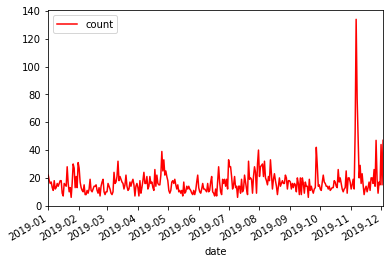

In [76]:
df_timeline.plot(kind='line',x='date',y='count',color='red')

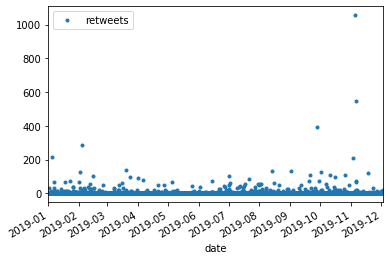

In [97]:
df_halasearch.plot(x='date',y='retweets', style=".")

### Importing AppleTV Trailer Twitter Data

In [77]:
df_appletv = pd.read_csv('halamovie.csv',encoding= 'utf-8')

In [78]:
df_appletv.head()

date         username       to  replies  retweets  favorites  \
0   12/2/19 21:31     victoriaguna  AppleTV        1         0          2   
1  11/26/19 23:42      TheBigIdito      NaN        1         0          0   
2  11/26/19 12:19  fiftyshadesofss  AppleTV        1         0          1   
3  11/22/19 19:49  AustralieJibril  AppleTV        0         1          1   
4  11/22/19 19:39   aloverofwords_  AppleTV        0         0          1   

                                                text  geo mentions  \
0       Stereotype on stereotype.. this is not okay.  NaN      NaN   
1  https://twitter.com/appletv/status/11917620977...  NaN      NaN   
2  Everyone (especially Muslim men) are so quick ...  NaN      NaN   
3  The uproar over a B grade TV series depicting ...  NaN      NaN   
4  We do not need your validation. STOP PORTRAYIN...  NaN      NaN   

                                            hashtags            id  \
0                                                NaN  1.201610e+18   
1                                                NaN  1.199470e+18   
2                                                NaN  1.199300e+18   
3  #Rohingya #GazaUnderAttack #syria #Uighurs #ka...  1.197970e+18   
4                                                NaN  1.197960e+18   

                                           permalink  
0  https://twitter.com/victoriaguna/status/120161...  
1  https://twitter.com/TheBigIdito/status/1199473...  
2  https://twitter.com/fiftyshadesofss/status/119...  
3  https://twitter.com/AustralieJibril/status/119...  
4  https://twitter.com/aloverofwords_/status/1197...

### Formatting AppleTV DF date column

In [98]:
df_appletv['date'] = df_appletv['date'].str.split(" ").str[0]

In [100]:
df_appletv['date'] = df_appletv['date'].apply(pd.to_datetime)

In [101]:
df_appletv.sort_values(by=['retweets'],ascending = False)

date         username           to  replies  retweets  favorites  \
4096 2019-11-05      bilqees_786      AppleTV      417     15000      33245   
3439 2019-11-06       myeshachou      AppleTV       65      4388      10533   
811  2019-11-07      crackerboyy      AppleTV       69      3052      15551   
3830 2019-11-05    Rowaida_Abdel      AppleTV       58      1614       4043   
4062 2019-11-05        nisha19xo      AppleTV       33      1359       5015   
3860 2019-11-05     QasimHickman      AppleTV       25      1341       4547   
3287 2019-11-06   ibraheem_batta      AppleTV       13      1070       2877   
4241 2019-11-05          AppleTV          NaN     1155      1055       4547   
3625 2019-11-06         MansaCam      AppleTV       25       867       2434   
2772 2019-11-06       queen_myms      AppleTV        6       741       1542   
3569 2019-11-06    DarakshanRaja      AppleTV       13       432       1291   
4223 2019-11-05        rollajabi      AppleTV        7       408       1270   
3444 2019-11-06       omarsouria      AppleTV       10       352       1344   
3856 2019-11-05      ahaamustafa      AppleTV        8       262       1270   
4015 2019-11-05       Ikram__xxx      AppleTV        6       217        825   
2841 2019-11-06       aminnnaaaa      AppleTV        4       184        615   
4209 2019-11-05    ayyubidempire      AppleTV       10       179        566   
3933 2019-11-05          jxdrxxn      AppleTV        8       172        595   
3977 2019-11-05    shikshakshok_      AppleTV        4       162        480   
3196 2019-11-06        blxckswns      AppleTV        6       155       1129   
641  2019-11-07   JaiPasLinspiLa      AppleTV        4       144        320   
3986 2019-11-05        emohijabi      AppleTV        4       143        638   
3159 2019-11-06        TheMcBang      AppleTV        1       121        448   
3083 2019-11-06        Taqi_Ra3d      AppleTV        1       119        444   
3490 2019-11-06         samaraa0      AppleTV       10       116        659   
4094 2019-11-05         LilNaanX      AppleTV        3       114        453   
4155 2019-11-05        Afgeezy97      AppleTV        6       114        374   
4225 2019-11-05  manicpixihijabi      AppleTV        2       100        310   
3464 2019-11-06    blackishgold_      AppleTV       25        90        621   
3984 2019-11-05         azzaabid      AppleTV        2        83        204   
3150 2019-11-06        makloubae      AppleTV        0        83        226   
2362 2019-11-06         safijas_      AppleTV        1        82        133   
63   2019-11-09        AlMaarri1      AppleTV        6        79        231   
1900 2019-11-06         _Kenza_G      AppleTV        4        77        188   
3113 2019-11-06  intrglacticjoon      AppleTV        7        73        196   
3707 2019-11-06    syedahsabrina      AppleTV        7        72        176   
2530 2019-11-06        ghetto004      AppleTV        4        70        259   
4188 2019-11-05         uhhhhmad      AppleTV        6        69        599   
2709 2019-11-06    amenaofficial      AppleTV       10        69        179   
3501 2019-11-06     alaztekiyyah      AppleTV        9        66        274   
3814 2019-11-05        RubyRozay      AppleTV        3        64        130   
4177 2019-11-05    yeahshewrites          NaN        4        64        178   
3839 2019-11-05      _diyabahmed      AppleTV        2        63        168   
2897 2019-11-06      tasleekpapi      AppleTV        1        60        204   
1482 2019-11-06       taestychai      AppleTV        9        53        142   
149  2019-11-08     amandarabaab      AppleTV        3        52         43   
3864 2019-11-05         dumbdidi      AppleTV        1        52        291   
4198 2019-11-05    milksheikhman      AppleTV        5        52        286   
4132 2019-11-05     khatunetwork      AppleTV        1        51        190   
2108 2019-11-06          summmxr      AppleTV        1       

In [102]:
df_appletv.sort_values(by=['favorites'],ascending = False)

date         username           to  replies  retweets  favorites  \
4096 2019-11-05      bilqees_786      AppleTV      417     15000      33245   
811  2019-11-07      crackerboyy      AppleTV       69      3052      15551   
3439 2019-11-06       myeshachou      AppleTV       65      4388      10533   
4062 2019-11-05        nisha19xo      AppleTV       33      1359       5015   
4241 2019-11-05          AppleTV          NaN     1155      1055       4547   
3860 2019-11-05     QasimHickman      AppleTV       25      1341       4547   
3830 2019-11-05    Rowaida_Abdel      AppleTV       58      1614       4043   
3287 2019-11-06   ibraheem_batta      AppleTV       13      1070       2877   
3625 2019-11-06         MansaCam      AppleTV       25       867       2434   
2772 2019-11-06       queen_myms      AppleTV        6       741       1542   
3444 2019-11-06       omarsouria      AppleTV       10       352       1344   
3569 2019-11-06    DarakshanRaja      AppleTV       13       432       1291   
3856 2019-11-05      ahaamustafa      AppleTV        8       262       1270   
4223 2019-11-05        rollajabi      AppleTV        7       408       1270   
3196 2019-11-06        blxckswns      AppleTV        6       155       1129   
4015 2019-11-05       Ikram__xxx      AppleTV        6       217        825   
3490 2019-11-06         samaraa0      AppleTV       10       116        659   
3986 2019-11-05        emohijabi      AppleTV        4       143        638   
3464 2019-11-06    blackishgold_      AppleTV       25        90        621   
2841 2019-11-06       aminnnaaaa      AppleTV        4       184        615   
4188 2019-11-05         uhhhhmad      AppleTV        6        69        599   
3933 2019-11-05          jxdrxxn      AppleTV        8       172        595   
4209 2019-11-05    ayyubidempire      AppleTV       10       179        566   
3977 2019-11-05    shikshakshok_      AppleTV        4       162        480   
4094 2019-11-05         LilNaanX      AppleTV        3       114        453   
3159 2019-11-06        TheMcBang      AppleTV        1       121        448   
3083 2019-11-06        Taqi_Ra3d      AppleTV        1       119        444   
4155 2019-11-05        Afgeezy97      AppleTV        6       114        374   
641  2019-11-07   JaiPasLinspiLa      AppleTV        4       144        320   
4225 2019-11-05  manicpixihijabi      AppleTV        2       100        310   
3864 2019-11-05         dumbdidi      AppleTV        1        52        291   
4198 2019-11-05    milksheikhman      AppleTV        5        52        286   
3501 2019-11-06     alaztekiyyah      AppleTV        9        66        274   
775  2019-11-07         whackkat      AppleTV        8        13        266   
2530 2019-11-06        ghetto004      AppleTV        4        70        259   
701  2019-11-07      hennaahmedx      AppleTV        6        30        254   
63   2019-11-09        AlMaarri1      AppleTV        6        79        231   
2111 2019-11-06         13yahebr      AppleTV        1        41        229   
3150 2019-11-06        makloubae      AppleTV        0        83        226   
3815 2019-11-05           nazuk0      AppleTV        1        48        209   
4031 2019-11-05        pharangry      AppleTV        4        47        205   
2108 2019-11-06          summmxr      AppleTV        1        51        205   
2897 2019-11-06      tasleekpapi      AppleTV        1        60        204   
3984 2019-11-05         azzaabid      AppleTV        2        83        204   
2620 2019-11-06         sherpace      AppleTV        2        50        202   
833  2019-11-07    YasMohammedxx      AppleTV       10        41        198   
3113 2019-11-06  intrglacticjoon      AppleTV        7        73        196   
4132 2019-11-05     khatunetwork      AppleTV        1        51        190   
1900 2019-11-06         _Kenza_G      AppleTV        4        77        188   
2893 2019-11-06   pocobookreader      AppleTV        7       

In [113]:
%%time
import glob
!pip install sklearn
!pip install textblob
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob




     |████████████████████████████████| 645kB 5.9MB/s eta 0:00:01
     |████████████████████████████████| 1.5MB 8.8MB/s eta 0:00:01
    Running setup.py install for nltk ... done
CPU times: user 346 ms, sys: 153 ms, total: 499 ms
Wall time: 5.79 s


In [171]:
def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# CUSTOM STOPWORDS
# FIRST, create a list of custom stopwords
from sklearn.feature_extraction import stop_words
custom_stopwords = ['1191762097740419077', 'apple','com', 'status', 'https', 'twitter','https','twitter','like', 'said','thee','ye', 'after','mostly','my','whereafter',
 'been',
 'sincere',
 'see',
 'con',
 'and',
 'elsewhere',
 'every',
 'however',
 'others',
 'over',
 'such',
 'since',
 'became',
 'any',
 'else',
 'below',
 'these',
 'against',
 'amoungst',
 'whole',
 'we',
 'all',
 'or',
 'full',
 'am',
 'have',
 'together',
 'across',
 'into',
 'hence',
 'sometimes',
 'thereafter',
 'must',
 'first',
 'moreover',
 'only',
 'alone',
 'than',
 'empty',
 'they',
 'yourselves',
 'myself',
 'few',
 'out',
 'ten',
 'done',
 'throughout',
 'twenty',
 'were',
 'whither',
 'also',
 'much',
 'here',
 'except',
 'sometime',
 'everything',
 'move',
 'as',
 'this',
 'un',
 'fire',
 'him',
 'an',
 'nevertheless',
 'latter',
 'take',
 'us',
 'etc',
 'along',
 'some',
 'off',
 'beside',
 'get',
 'whence',
 'anyone',
 'seemed',
 'towards',
 'further',
 'thus',
 'back',
 'interest',
 'never',
 'he',
 'ltd',
 'part',
 'yours',
 'seem',
 'perhaps',
 'should',
 'whenever',
 'neither',
 'under',
 'behind',
 'therein',
 'already',
 'do',
 'itself',
 'nobody',
 'hundred',
 'her',
 'your',
 'beyond',
 'is',
 'who',
 'would',
 'fill',
 'it',
 'may',
 'their',
 'fifteen',
 'himself',
 'those',
 'give',
 'hereafter',
 'them',
 'was',
 'enough',
 'front',
 'mill',
 'due',
 'most',
 'of',
 'top',
 'third',
 'sixty',
 'go',
 'twelve',
 'anywhere',
 'other',
 'so',
 'herein',
 'indeed',
 'none',
 'side',
 'because',
 'bottom',
 'thick',
 'thin',
 'put',
 'the',
 'from',
 'per',
 'seems',
 'three',
 'somewhere',
 'again',
 'thru',
 'within',
 'whereupon',
 'once',
 'bill',
 'whereby',
 'beforehand',
 'around',
 'although',
 'if',
 'often',
 'upon',
 'nor',
 'many',
 'to',
 'she',
 'up',
 'least',
 'hers',
 'that',
 'while',
 're',
 'you',
 'hereby',
 'ever',
 'same',
 'whom',
 'anyway',
 'yourself',
 'whatever',
 'becoming',
 'down',
 'eight',
 'can',
 'his',
 'one',
 'about',
 'former',
 'four',
 'hasnt',
 'via',
 'which',
 'be',
 'co',
 'thence',
 'either',
 'where',
 'serious',
 'always',
 'too',
 'toward',
 'becomes',
 'someone',
 'call',
 'themselves',
 'what',
 'even',
 'everyone',
 'keep',
 'name',
 'thereupon',
 'wherein',
 'formerly',
 'through',
 'somehow',
 'afterwards',
 'almost',
 'eleven',
 'two',
 'yet',
 'could',
 'on',
 'has',
 'i',
 'whether',
 'meanwhile',
 'nowhere',
 'found',
 'but',
 'describe',
 'wherever',
 'fifty',
 'amount',
 'now',
 'rather',
 'might',
 'very',
 'mine',
 'by',
 'forty',
 'whose',
 'less',
 'noone',
 'own',
 'before',
 'being',
 'detail',
 'de',
 'between',
 'me',
 'are',
 'onto',
 'something',
 'among',
 'namely',
 'though',
 'thereby',
 'in',
 'latterly',
 'there',
 'seeming',
 'hereupon',
 'why',
 'until',
 'above',
 'next',
 'had',
 'then',
 'whoever',
 'nine',
 'six',
 'well',
 'both',
 'during',
 'ours',
 'ie',
 'several',
 'find',
 'amongst',
 'become',
 'a',
 'eg',
 'at',
 'otherwise',
 'each',
 'whereas',
 'inc',
 'five',
 'anyhow',
 'how',
 'anything',
 'herself',
 'its',
 'our',
 'therefore',
 'when',
 'cant',
 'last',
 'with',
 'system',
 'everywhere',
 'another',
 'will',
 'more',
 'for',
 'besides']

# CUSTOM STOPWORDS
# THEN, instead of stop_words='english'
# add your custom stopwords into the vectorizer
vec = TfidfVectorizer(stop_words=custom_stopwords, max_features=250, use_idf=True)

# Fit from the 'text' column of our dataframe


In [172]:
matrix = vec.fit_transform(df_appletv['text'].values.astype('U'))
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

In [173]:
results

2019  actually        ah       ain  american  annoying   appletv  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.268592   
8     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.447626   
13    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
15    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
16    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
17    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.302743   
22    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.431789   
23    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
26    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.422927   
28    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
29    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
30    0.000000  0.215949  0.000000  0.000000  0.000000  0.000000  0.000000   
31    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
32    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
33    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
34    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
35    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
36    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
37    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
38    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
40    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
41    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
42    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
43    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
44    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
45    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
46    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
47    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
48    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
49    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
50    0.000000  0.000000  0.0000

In [189]:
%%time
from sklearn.cluster import KMeans

# How many clusters?
number_of_clusters=5
km = KMeans(n_clusters=number_of_clusters)

print("Fitting", number_of_clusters, "clusters usinga ", matrix.shape, "matrix")

# Let's fit it!
km.fit(matrix)
km.fit

Fitting 5 clusters usinga  (4242, 250) matrix
CPU times: user 3.52 s, sys: 21.5 ms, total: 3.54 s
Wall time: 3.61 s


In [190]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: tired imagine narrative im storyline
Cluster 1: no tv muslim white just
Cluster 2: not shit fuck movie muslims
Cluster 3: white muslim boy girl oppressed
Cluster 4: appletv bullshit wtf oh tired


In [191]:
df_appletv['category'] = km.labels_
df_appletv

date         username               to  replies  retweets  \
0    2019-12-02     victoriaguna          AppleTV        1         0   
1    2019-11-26      TheBigIdito              NaN        1         0   
2    2019-11-26  fiftyshadesofss          AppleTV        1         0   
3    2019-11-22  AustralieJibril          AppleTV        0         1   
4    2019-11-22   aloverofwords_          AppleTV        0         0   
5    2019-11-22    krustykrabboi          AppleTV        0         0   
6    2019-11-21       Bongani_MV          AppleTV        0         0   
7    2019-11-20   wajeeh_exactly              NaN        0         0   
8    2019-11-19        Dre__xoxo          AppleTV        0         0   
9    2019-11-18        susuajoke          AppleTV        0         3   
10   2019-11-18        ramahimay          AppleTV        0         1   
11   2019-11-16         halahfar          AppleTV        0         1   
12   2019-11-15       hafsa_jama              NaN        0         0   
13   2019-11-15          OLBGIRI          AppleTV        0         0   
14   2019-11-14       palestinhx          AppleTV        1         0   
15   2019-11-14     HangryHabibi          AppleTV        0         0   
16   2019-11-14        neptoonie          AppleTV        0         0   
17   2019-11-14      ShinAHatchi          AppleTV        0         0   
18   2019-11-13  ikonicblackjack          AppleTV        0         0   
19   2019-11-13         fizzaaat          AppleTV        1         0   
20   2019-11-13   no_jams_hijabi          AppleTV        0         0   
21   2019-11-13          ymn_emd          AppleTV        0         0   
22   2019-11-13      sefatfatema              NaN        0         0   
23   2019-11-13          Marx907          AppleTV        1         8   
24   2019-11-12      itsghousu99          AppleTV        0         0   
25   2019-11-12        thickzoro          AppleTV        0         4   
26   2019-11-12         muzmatch          AppleTV        1         0   
27   2019-11-12    SyedUbaid1995          AppleTV        0         0   
28   2019-11-12         indihryn          AppleTV        0         0   
29   2019-11-12         indihryn          AppleTV        0         0   
30   2019-11-12        mdzulkar9          AppleTV        0         1   
31   2019-11-12        sifthebad          AppleTV        0         0   
32   2019-11-11       AReminder0          AppleTV        5        25   
33   2019-11-11      zadjalisama          AppleTV        3         2   
34   2019-11-11      HalaZadjali          AppleTV        0         0   
35   2019-11-11       dadygucci4          AppleTV        0         0   
36   2019-11-11          DEKSTR8  mattatmattatmat        1         0   
37   2019-11-11      ThisIsBeann          AppleTV        0         0   
38   2019-11-11     dame_mercury      kelsiedarko        0         0   
39   2019-11-11   tailorcontents              NaN        0        21   
40   2019-11-11     Sacajawea_12          AppleTV        0         0   
41   2019-11-11      palikid_jpg          AppleTV        0         0   
42   2019-11-11          SidiqJ3          AppleTV        1         4   
43   2019-11-11    marhabayakhay          AppleTV        1         0   
44   2019-11-10    131inyourarea              NaN        1         0   
45   2019-11-10         aneela__          AppleTV        0         0   
46   2019-11-10           Mzy786          AppleTV        0         0   
47   2019-11-10   itsdidibitches              NaN        0         1   
48   2019-11-10         la2noyes          AppleTV        1         0   
49   2019-11-10          alaalzx          AppleTV        0         0   
50   2019-11-10        cudimepie          AppleTV        1         0   
51   2019-11-10      Samar_Yehya          AppleTV        0         0   
52   2019-11-10    _Motorbreath_          AppleTV        0         0   
53   2019-11-10      dontbeaware          AppleTV        0         0   
54   2019-11-10        daryn_osm          AppleTV  